<a href="https://colab.research.google.com/github/malienist/FIRST-JP/blob/main/notebooks/w_CIFAR_10_4D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Adversarial Attacks on CIFAR-10

Welcome to this interactive Colab notebook where we will explore adversarial attacks on the CIFAR-10 dataset. CIFAR-10 is a well-known dataset consisting of 60,000 32x32 color images in 10 different classes, with 6,000 images per class. The dataset is widely used for training machine learning and computer vision models.

In this notebook, you will learn about:

- Loading and visualizing CIFAR-10 data
- Implementing and evaluating a pre-trained model on CIFAR-10
- Generating adversarial examples using the Fast Gradient Sign Method (FGSM)
- Enhancing adversarial attacks with the Projected Gradient Descent (PGD) method
- Visualizing and comparing original and adversarial images

Let's get started!

## Table of Contents

1. [Setup and Environment Preparation](#setup)
2. [Loading CIFAR-10 Data](#loading-data)
3. [Defining and Evaluating the Model](#defining-model)
4. [Generating Adversarial Examples using FGSM](#fgsm)
5. [Enhancing Attacks with PGD](#pgd)
6. [Visualizing Adversarial Examples](#visualizing)

## 1. Setup and Environment Preparation <a name="setup"></a>

First, we need to install and import the necessary libraries, including PyTorch, torchvision, matplotlib, numpy, and Foolbox for adversarial attacks.

```python
# Install required libraries
!pip install torch torchvision foolbox matplotlib numpy

In [ ]:
!pip install torch torchvision matplotlib numpy foolbox

# Import libraries
- import torch
- import torchvision
- import torchvision.transforms as transforms
- import matplotlib.pyplot as plt
- import numpy as np

- import foolbox as fb
- from foolbox.attacks import FGSM, LinfPGD

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

import foolbox as fb
from foolbox.attacks import LinfPGD

# Loading CIFAR-10 Data <a name="loading-data"></a>
We will load the CIFAR-10 dataset and prepare it for model training and evaluation.

In [ ]:
# Load CIFAR-10 dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=1, shuffle=True)

100%|██████████| 170498071/170498071 [00:02<00:00, 74349488.52it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data


# Defining and Evaluating the Model <a name="defining-model"></a>
We will use a pre-trained ResNet18 model for classification and evaluate its performance on the CIFAR-10 dataset.

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 134MB/s]


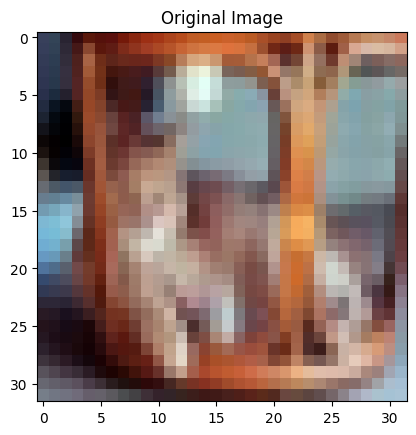

In [ ]:
# Define a simple model (using pretrained ResNet18 for demonstration)
model = torchvision.models.resnet18(pretrained=True)
model.eval()

# Select a sample image from the testset
dataiter = iter(testloader)
images, labels = next(dataiter)

# Display the original image
def imshow(img, title):
    if img.ndim == 4:
        # Display the first image in the batch
        img = img[0]

    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.title(title)
    plt.show()

imshow(images[0], title='Original Image')

# Generating Adversarial Examples using FGSM <a name="fgsm"></a>
Let's implement the Fast Gradient Sign Method (FGSM) to generate adversarial examples.

# Enhancing Attacks with PGD <a name="pgd"></a>
We will now enhance our attack using the Projected Gradient Descent (PGD) method for more robust adversarial examples.

# Visualizing Adversarial Examples <a name="visualizing"></a>
Finally, we will visualize the differences between the original and adversarial images.

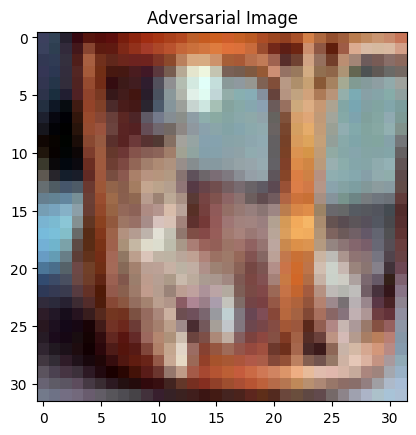

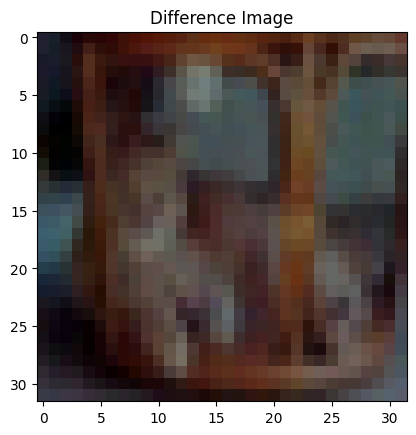

In [ ]:
# Create Foolbox model
# Adjust bounds to match normalization
fmodel = fb.PyTorchModel(model, bounds=(-1, 1))

# Apply an adversarial attack
attack = LinfPGD()
epsilons = [0.03]
adversarials = attack(fmodel, images, labels, epsilons=epsilons)

# Extract the first adversarial image
adversarial_image = adversarials[0]

# Ensure adversarial_image is a tensor
if isinstance(adversarial_image, list):
    adversarial_image = adversarial_image[0]

if isinstance(adversarial_image, torch.Tensor):
    adversarial_image = adversarial_image.cpu()

# Display the adversarial image
imshow(adversarial_image, title='Adversarial Image')

# Display the difference
diff = adversarial_image - (images[0] / 2 + 0.5)
imshow(diff, title='Difference Image')